# Import Library


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load Dataset and Performing EDA, PCA

In [2]:
# Load all 2 datasets
mitbih_train = pd.read_csv("C:/Users/Thaarani Sivakkumar/Downloads/mitbih_train.csv", header=None)
mitbih_test = pd.read_csv("C:/Users/Thaarani Sivakkumar/Downloads/mitbih_test.csv", header=None)

In [3]:
# Merge all datasets into one
df = pd.concat([mitbih_train, mitbih_test], ignore_index=True)
# Shuffle data to mix different sources
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# Display basic info EDA start
print("Merged Dataset Shape:", df.shape)
df.head()

Merged Dataset Shape: (109446, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.906250,0.603516,0.283203,0.080078,0.056641,0.050781,0.056641,0.048828,0.052734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1.000000,0.834677,0.524194,0.169355,0.000000,0.129032,0.221774,0.282258,0.290323,0.302419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.539715,0.197556,0.193483,0.101833,0.000000,0.032587,0.138493,0.242363,0.283096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.892632,0.907368,0.505263,0.092632,0.040000,0.080000,0.088421,0.088421,0.073684,0.069474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.978155,0.907767,0.694175,0.247573,0.106796,0.152913,0.101942,0.048544,0.036408,0.031553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:

# Display basic dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

# Check column types and missing values
print("\nColumn Info:")
print(df.info())


Dataset Shape: (109446, 188)

First 5 Rows:
        0         1         2         3         4         5         6    \
0  1.000000  0.906250  0.603516  0.283203  0.080078  0.056641  0.050781   
1  1.000000  0.834677  0.524194  0.169355  0.000000  0.129032  0.221774   
2  1.000000  0.539715  0.197556  0.193483  0.101833  0.000000  0.032587   
3  0.892632  0.907368  0.505263  0.092632  0.040000  0.080000  0.088421   
4  0.978155  0.907767  0.694175  0.247573  0.106796  0.152913  0.101942   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.056641  0.048828  0.052734  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.282258  0.290323  0.302419  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.138493  0.242363  0.283096  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.088421  0.073684  0.069474  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.048544  0.036408  0.031553  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  2.

In [5]:
# Count missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)



Missing Values:
 0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,...,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000
mean,0.891170,0.758909,0.424503,0.219602,0.201237,0.210298,0.205607,0.201617,0.198480,0.196610,...,0.004937,0.004568,0.004237,0.003914,0.003673,0.003469,0.003210,0.002956,0.002835,0.473439
std,0.239657,0.221190,0.227561,0.207248,0.177191,0.171965,0.178374,0.177020,0.171469,0.168028,...,0.043951,0.042109,0.040471,0.038801,0.037465,0.036552,0.035015,0.033413,0.032620,1.143232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922252,0.682648,0.251014,0.048853,0.082418,0.088300,0.073171,0.066093,0.064893,0.068615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991202,0.826560,0.430174,0.166355,0.147842,0.158640,0.145078,0.144465,0.150073,0.148849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910868,0.579832,0.342707,0.259045,0.287500,0.298343,0.295235,0.290623,0.283465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


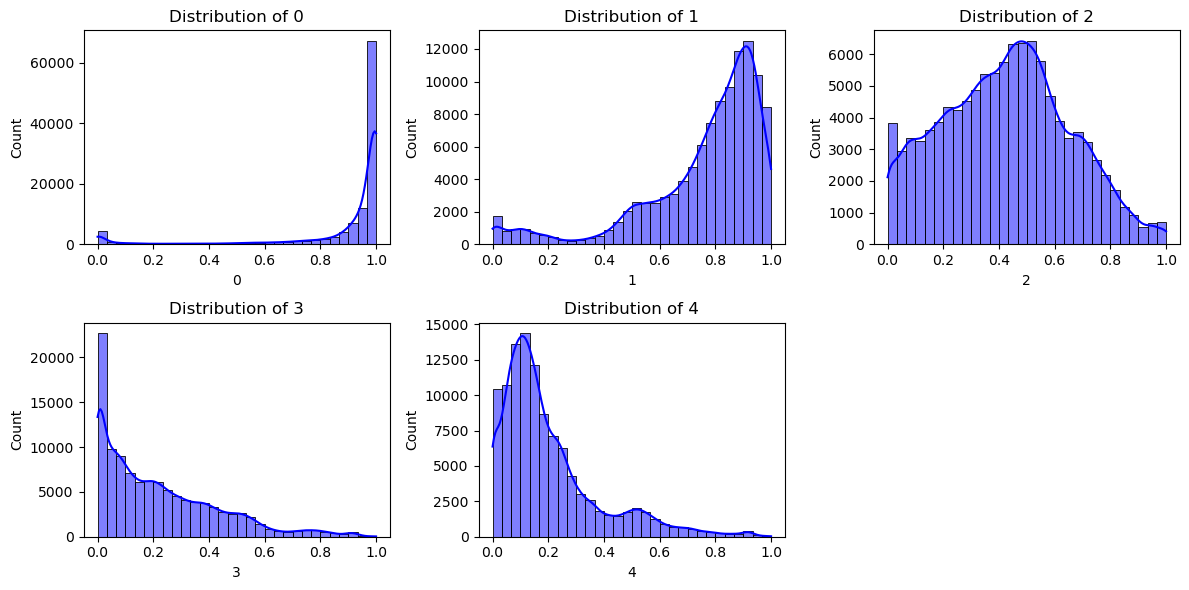

In [7]:
# Select a few sample columns to plot their distributions
sample_features = df.columns[:5]  # Select first 6 numeric columns

# Plot distributions
plt.figure(figsize=(12,6))
for i, col in enumerate(sample_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


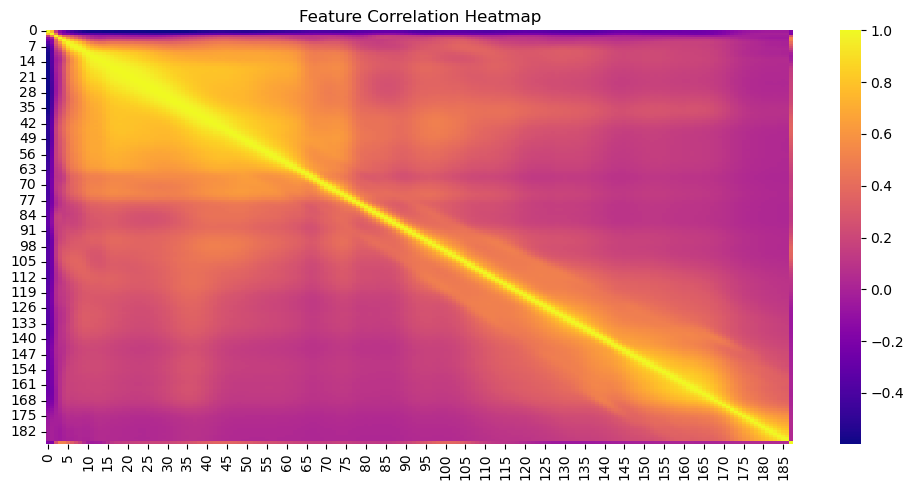

In [8]:
# Assuming df is your DataFrame and "Dataset" is the column to drop
#corr_matrix = df.drop(columns=["Dataset"]).corr()
corr_matrix = df.corr()
#df=df.drop(columns=["Dataset"])
plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix,
    cmap="plasma",
    annot=False,
)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


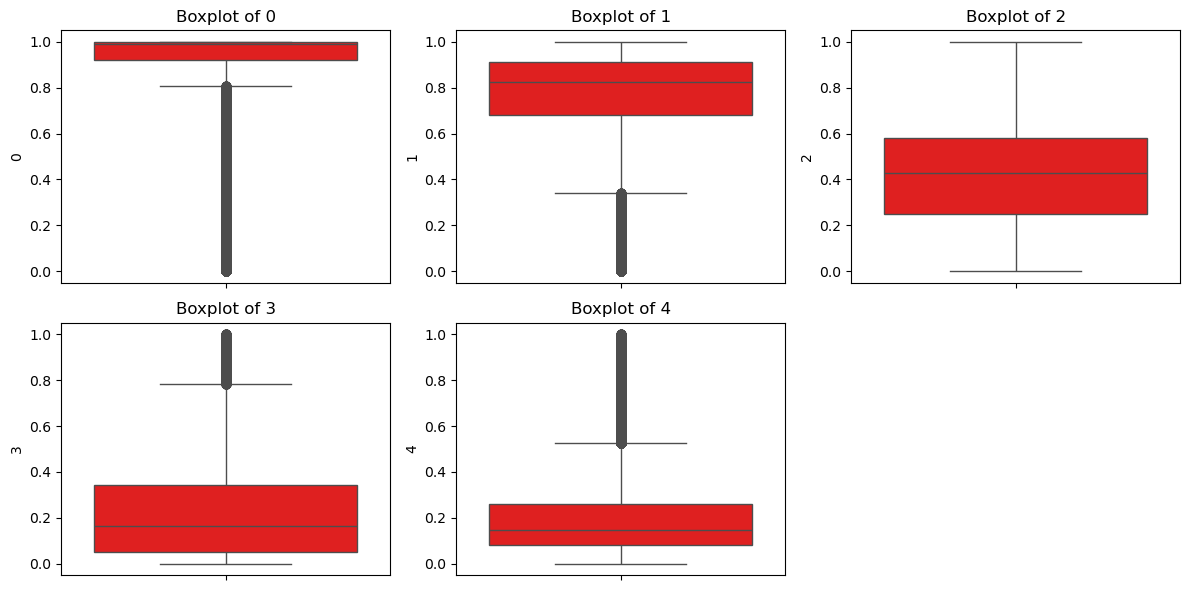

In [9]:
# Boxplot for first 5 numeric columns
plt.figure(figsize=(12,6))
for i, col in enumerate(sample_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color="red")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [10]:
#Apply PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-2])  # Excluding labels & dataset column


In [12]:
# Apply PCA
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

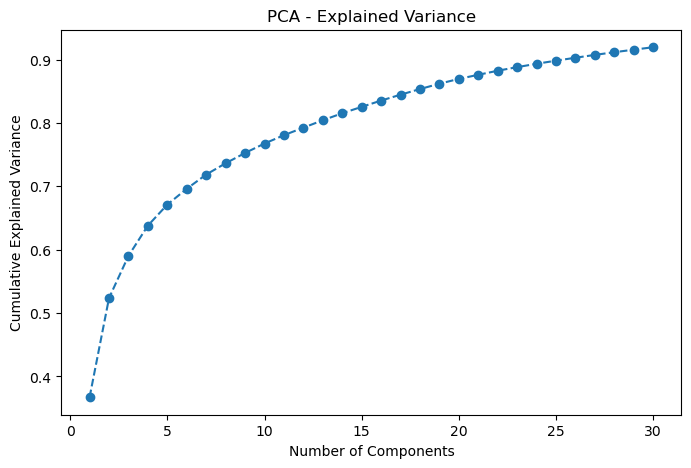

In [13]:
# Check variance explained by components
plt.figure(figsize=(8,5))
plt.plot(range(1, 31), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.show()

In [14]:
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(30)])

# Add back the label column
df_pca['Label'] = df.iloc[:, -1].values  

# Now df_pca contains 30 PCA features + 1 label column
df = df_pca  

# Splitting into Train(70%) & Test(30%)
# Plotting the distrubutions

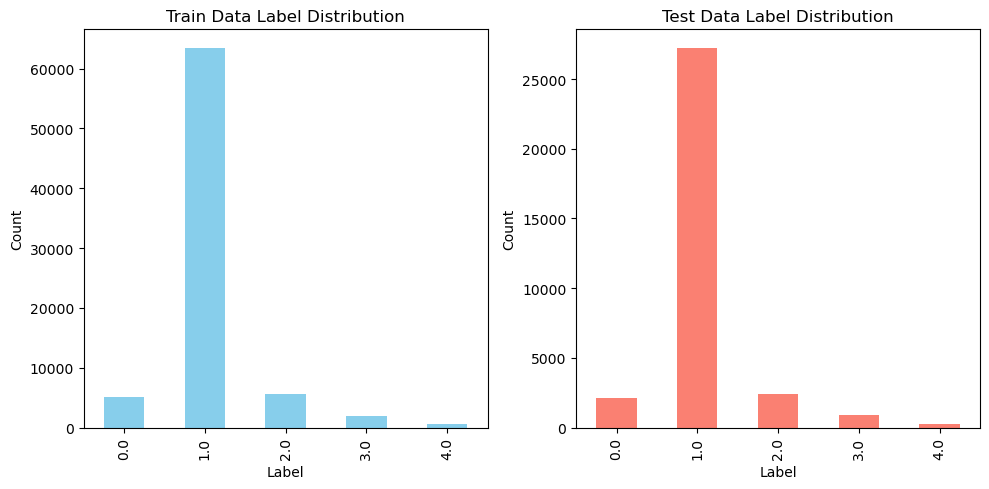

             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
39598  -9.079546  1.635634  0.114849  0.553529 -1.206534  1.029402 -0.504937   
107704 -2.413714 -1.153951 -0.637268  2.121680 -0.646161 -0.799283 -1.131131   
67989  -6.517562  0.755011 -1.324506  2.758156 -1.481966 -0.208334 -1.047617   
3152   -5.825578  1.229529 -3.309890  2.825724  0.511753 -3.477245  1.963368   
2543   -1.990019 -2.161896  0.842964  3.222442 -3.707090  2.052826  0.571828   

             PC8       PC9      PC10  ...      PC22      PC23      PC24  \
39598   0.379151 -3.160035  0.340792  ... -0.613705  1.300813 -1.114137   
107704  1.888687 -0.017982 -2.063732  ... -0.893169  0.619954 -0.627580   
67989   1.278252  1.065807 -1.751942  ...  0.627502  0.511304  0.068532   
3152    0.420452 -0.501183 -1.275956  ... -0.942311 -1.043795  0.516957   
2543    0.312165  2.634909  3.219013  ... -0.125546  0.525738 -0.378400   

            PC25      PC26      PC27      PC28      PC29      PC30  

In [15]:
# Convert categorical labels to numeric
label_mapping = {label: idx for idx, label in enumerate(df.iloc[:, -1].unique())}
df.iloc[:, -1] = df.iloc[:, -1].map(label_mapping)

# Split into train (70%) and test (30%)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Plot label distribution in train and test sets
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
train_df.iloc[:, -1].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Train Data Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
test_df.iloc[:, -1].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Test Data Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
print(train_df.head(),test_df.head())

# Seperating as features and labels

In [16]:
# Convert categorical labels to numeric
label_mapping = {label: idx for idx, label in enumerate(df.iloc[:, -1].unique())}
df.iloc[:, -1] = df.iloc[:, -1].map(label_mapping)

# Extracting the features and labels from the dataset and training the model
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]


# Initialize models

In [17]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Linear SVC": LinearSVC(random_state=42, max_iter=10000),
    "SVC": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss')
}

# Train and evaluate models

In [18]:
results = []
train_data_features=X_train
train_data_labels=y_train
test_data_features=X_test
test_data_labels=y_test

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(train_data_features, train_data_labels)  # Train the model
    
    y_pred = model.predict(test_data_features)  # Predict on test data
    
    # Evaluate model performance
    acc = accuracy_score(test_data_labels, y_pred)
    f1 = f1_score(test_data_labels, y_pred, average='weighted')
    precision = precision_score(test_data_labels, y_pred, average='weighted')
    recall = recall_score(test_data_labels, y_pred, average='weighted')
    
    results.append({
        "Model": model_name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall
    })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

Training Random Forest...
Training Linear SVC...
Training SVC...
Training XGBoost...
           Model  Accuracy  F1 Score  Precision    Recall
0  Random Forest  0.969452  0.967316   0.969316  0.969452
1     Linear SVC  0.887403  0.852861   0.854488  0.887403
2            SVC  0.961808  0.958319   0.960878  0.961808
3        XGBoost  0.973990  0.972564   0.973379  0.973990


# The performance metrics obtained from XGboost, SVC, random forest, and linearSVC models

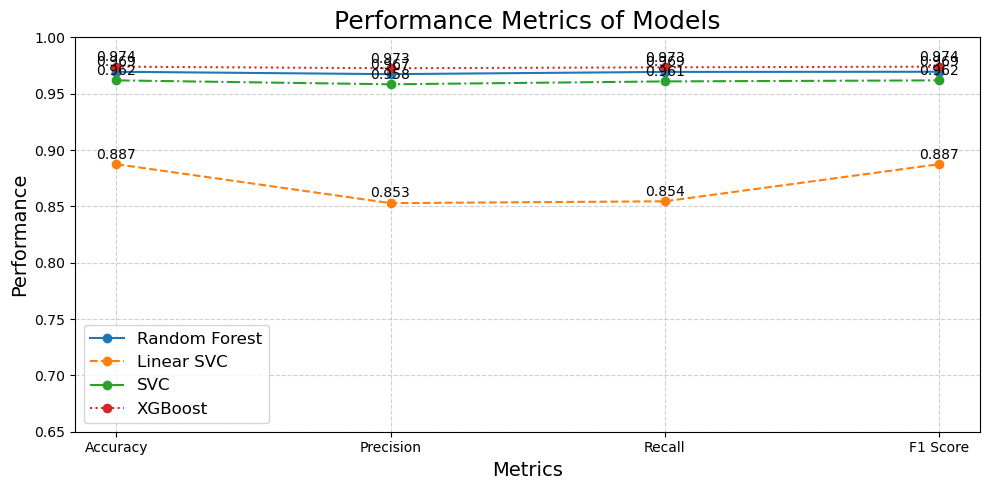

In [19]:
models = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Extract metrics dynamically
random_forest = results_df[results_df['Model'] == 'Random Forest'].iloc[0, 1:].values
linear_svc = results_df[results_df['Model'] == 'Linear SVC'].iloc[0, 1:].values
svc = results_df[results_df['Model'] == 'SVC'].iloc[0, 1:].values
xgboost = results_df[results_df['Model'] == 'XGBoost'].iloc[0, 1:].values

# Combine results into a single array
data = [random_forest, linear_svc, svc, xgboost]
model_labels = ['Random Forest', 'Linear SVC', 'SVC', 'XGBoost']

# Plot each model's performance metrics
plt.figure(figsize=(10, 5))
for i, label in enumerate(model_labels):
    plt.plot(models, data[i], marker='o', label=label, linestyle=['-', '--', '-.', ':'][i])

# Customize the plot
plt.title('Performance Metrics of Models', fontsize=18)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Performance', fontsize=14)
plt.ylim(0.65, 1.0)  # Adjust y-axis range for better visualization
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Add annotations for each data point
for j, metric in enumerate(models):
    for i, label in enumerate(model_labels):
        plt.text(j, data[i][j] + 0.005, f"{data[i][j]:.3f}", ha='center', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

# Metaheuristic Optimization algorithms
### If you want to have best results increase the population_size and generations , (like 20-100)

In [31]:
# Define evaluation function
def evaluate_model(params):
    model = xgb.XGBClassifier(
        n_jobs=-1,  # Enable parallelism
        learning_rate=params[0],
        max_depth=int(params[1]),
        n_estimators=int(params[2]),
        random_state=42,
        eval_metric="mlogloss"
    )
    model.fit(train_data_features, train_data_labels)
    y_pred = model.predict(test_data_features)
    f1 = f1_score(test_data_labels, y_pred, average="macro")
    return -f1  # Negative because optimizers minimize the function

# Define JADE Optimizer
class JADE:
    def __init__(self, func, bounds, population_size=5, generations=8):
        self.func = func
        self.bounds = np.array(bounds)
        self.pop_size = population_size
        self.generations = generations

    def optimize(self):
        dim = len(self.bounds)
        population = np.random.rand(self.pop_size, dim)
        population = self.bounds[:, 0] + population * (self.bounds[:, 1] - self.bounds[:, 0])
        fitness = np.apply_along_axis(self.func, 1, population)

        for gen in range(self.generations):
            for i in range(self.pop_size):
                idxs = [idx for idx in range(self.pop_size) if idx != i]
                x1, x2, x3 = population[np.random.choice(idxs, 3, replace=False)]
                mutant = x1 + 0.5 * (x2 - x3)
                mutant = np.clip(mutant, self.bounds[:, 0], self.bounds[:, 1])
                crossover = np.random.rand(dim) < 0.9
                trial = np.where(crossover, mutant, population[i])
                trial_fitness = self.func(trial)
                if trial_fitness < fitness[i]:
                    population[i] = trial
                    fitness[i] = trial_fitness
        return population[np.argmin(fitness)], np.min(fitness)


# Define LevyJA Optimizer
class LevyJA:
    def __init__(self, func, bounds, population_size=5, generations=8):
        self.func = func
        self.bounds = np.array(bounds)
        self.pop_size = population_size
        self.generations = generations

    def levy_flight(self, beta=1.5):
        sigma = (math.gamma(1 + beta) * np.sin(np.pi * beta / 2) / 
                 (math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
        u = np.random.normal(0, sigma, size=len(self.bounds))
        v = np.random.normal(0, 1, size=len(self.bounds))
        step = u / np.abs(v) ** (1 / beta)
        return step

    def optimize(self):
        dim = len(self.bounds)
        population = np.random.rand(self.pop_size, dim)
        population = self.bounds[:, 0] + population * (self.bounds[:, 1] - self.bounds[:, 0])
        fitness = np.apply_along_axis(self.func, 1, population)

        for gen in range(self.generations):
            for i in range(self.pop_size):
                best_idx = np.argmin(fitness)
                step = self.levy_flight()
                new_candidate = population[i] + step * (population[best_idx] - population[i])
                new_candidate = np.clip(new_candidate, self.bounds[:, 0], self.bounds[:, 1])
                new_fitness = self.func(new_candidate)
                if new_fitness < fitness[i]:
                    population[i] = new_candidate
                    fitness[i] = new_fitness
        return population[np.argmin(fitness)], np.min(fitness)


# Define EnhancedAEO Optimizer
class EnhancedAEO:
    def __init__(self, func, bounds, population_size=5, generations=8):
        self.func = func
        self.bounds = np.array(bounds)
        self.pop_size = population_size
        self.generations = generations

    def optimize(self):
        dim = len(self.bounds)
        population = np.random.rand(self.pop_size, dim)
        population = self.bounds[:, 0] + population * (self.bounds[:, 1] - self.bounds[:, 0])
        fitness = np.apply_along_axis(self.func, 1, population)

        for gen in range(self.generations):
            consumption_rate = np.random.uniform(0.5, 1.0)
            for i in range(self.pop_size):
                best_idx = np.argmin(fitness)
                worst_idx = np.argmax(fitness)
                producer = population[best_idx] + consumption_rate * (population[best_idx] - population[worst_idx])
                producer = np.clip(producer, self.bounds[:, 0], self.bounds[:, 1])
                producer_fitness = self.func(producer)
                if producer_fitness < fitness[i]:
                    population[i] = producer
                    fitness[i] = producer_fitness
        return population[np.argmin(fitness)], np.min(fitness)


# Define OriginalJA Optimizer
class OriginalJA:
    def __init__(self, func, bounds, population_size=5, generations=8):
        self.func = func
        self.bounds = np.array(bounds)
        self.pop_size = population_size
        self.generations = generations

    def optimize(self):
        dim = len(self.bounds)
        population = np.random.rand(self.pop_size, dim)
        population = self.bounds[:, 0] + population * (self.bounds[:, 1] - self.bounds[:, 0])
        fitness = np.apply_along_axis(self.func, 1, population)

        for gen in range(self.generations):
            best_idx = np.argmin(fitness)
            worst_idx = np.argmax(fitness)
            for i in range(self.pop_size):
                step = np.random.uniform(0, 1, size=dim)
                new_candidate = population[i] + step * (population[best_idx] - population[worst_idx])
                new_candidate = np.clip(new_candidate, self.bounds[:, 0], self.bounds[:, 1])
                new_fitness = self.func(new_candidate)
                if new_fitness < fitness[i]:
                    population[i] = new_candidate
                    fitness[i] = new_fitness
        return population[np.argmin(fitness)], np.min(fitness)


import time
start_time = time.time()
# Main execution
# Set reduced bounds for hyperparameters
bounds = [
    [0.3, 0.4],   # learning_rate bounds
    [5, 10],        # max_depth bounds
    [150, 250]     # n_estimators bounds
]

optimizers = {
    "XGB+OriginalJA": OriginalJA(evaluate_model, bounds, population_size=5, generations=8),
    "XGB+LevyJA": LevyJA(evaluate_model, bounds, population_size=5, generations=8),
    "XGB+JADE": JADE(evaluate_model, bounds, population_size=5, generations=8),
    "XGB+EnhancedAEO": EnhancedAEO(evaluate_model, bounds, population_size=5, generations=8),
    "XGB": xgb.XGBClassifier(random_state=42, eval_metric="mlogloss")
}


# Execution with Progress Display
print("Running Optimization Models...")
results = {}
for name, optimizer in optimizers.items():
    print(f"Training {name}...")
    if name == "XGB":
        model = xgb.XGBClassifier(random_state=42, eval_metric="mlogloss")
        model.fit(train_data_features, train_data_labels)
        y_pred = model.predict(test_data_features)
        metrics = {
            "Accuracy": accuracy_score(test_data_labels, y_pred),
            "Precision": precision_score(test_data_labels, y_pred, average="macro"),
            "Recall": recall_score(test_data_labels, y_pred, average="macro"),
            "F1 Score": f1_score(test_data_labels, y_pred, average="macro")
        }
        results[name] = {"Metrics": metrics}
        continue
    best_params, best_score = optimizer.optimize()
    print(f"{name} Best Params: {best_params}, Best Score: {-best_score}")
    results[name] = {"Best Params": best_params, "Best F1 Score": -best_score}  # Convert back to positive F1 score

    # Train model with optimized params
    model = xgb.XGBClassifier(
        n_jobs=-1,  # Enable parallelism
        learning_rate=best_params[0],
        max_depth=int(best_params[1]),
        n_estimators=int(best_params[2]),
        random_state=42,
        eval_metric="mlogloss"
    )
    model.fit(train_data_features, train_data_labels)
    y_pred = model.predict(test_data_features)
    metrics = {
        "Accuracy": accuracy_score(test_data_labels, y_pred),
        "Precision": precision_score(test_data_labels, y_pred, average="macro"),
        "Recall": recall_score(test_data_labels, y_pred, average="macro"),
        "F1 Score": f1_score(test_data_labels, y_pred, average="macro")
    }
    results[name]["Metrics"] = metrics
print("Optimization complete. Plotting results...")
print('')
print(f"Execution time: {time.time() - start_time} seconds")

Running Optimization Models...
Training XGB+OriginalJA...
XGB+OriginalJA Best Params: [  0.36987923   9.13646464 174.04657228], Best Score: 0.8830422997596588
Training XGB+LevyJA...
XGB+LevyJA Best Params: [  0.30690895   8.1405567  166.83147708], Best Score: 0.8829427230276579
Training XGB+JADE...
XGB+JADE Best Params: [  0.3509719    9.5616528  196.85723416], Best Score: 0.8851126795897344
Training XGB+EnhancedAEO...
XGB+EnhancedAEO Best Params: [  0.30846139   9.35529998 152.19307331], Best Score: 0.882897110465176
Training XGB...
Optimization complete. Plotting results...

Execution time: 1114.93079662323 seconds


##  The performance metrics obtained from XBboost, and XGboost with OriginalJA, LevyJA, JADE, and EnhancedAEO hybrid models

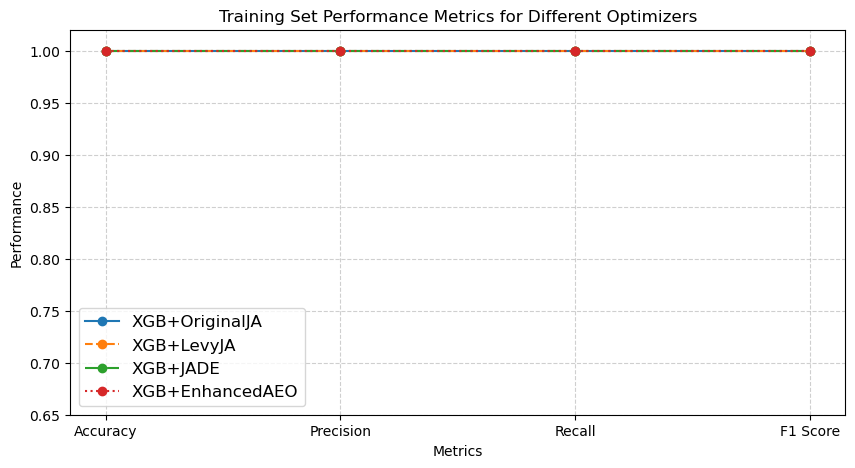

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define the best parameters for each optimizer (from your output)
best_params_dict = {
    'XGB+OriginalJA': {'learning_rate': 0.31414404, 'max_depth': int(10), 'n_estimators': int(150)},
    'XGB+LevyJA': {'learning_rate': 0.3015698, 'max_depth': int(10), 'n_estimators': int(154)},
    'XGB+JADE': {'learning_rate': 0.35073929, 'max_depth': int(10), 'n_estimators': int(236)},
    'XGB+EnhancedAEO': {'learning_rate': 0.38348131, 'max_depth': int(9), 'n_estimators': int(220)},
}

train_results = {}

# Evaluate and collect metrics
for name, best_params in best_params_dict.items():
    model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)

    acc = accuracy_score(y_train, y_train_pred)
    prec = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    rec = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

    train_results[name] = {
        'Metrics': {
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1
        }
    }

# Plotting
metrics_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
linestyles = ['-', '--', '-.', ':']

plt.figure(figsize=(10, 5))

for i, (opt, result) in enumerate(train_results.items()):
    metrics = result['Metrics']
    plt.plot(metrics_names, list(metrics.values()), marker="o", label=opt, linestyle=linestyles[i % len(linestyles)])

plt.xlabel("Metrics")
plt.ylabel("Performance")
plt.title("Training Set Performance Metrics for Different Optimizers")
plt.legend(fontsize=12)
plt.ylim(0.65, 1.02)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


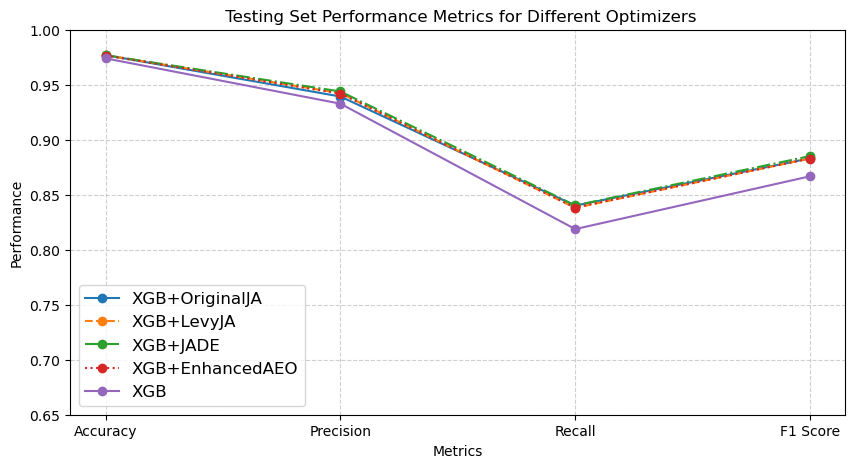

In [33]:
# Plot results
metrics_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
linestyles = ['-', '--', '-.', ':']  # Define line styles
plt.figure(figsize=(10, 5))

# Loop through results and assign a linestyle based on the index
for i, (opt, result) in enumerate(results.items()):
    metrics = result['Metrics']
    plt.plot(metrics_names, list(metrics.values()), marker="o", label=opt, linestyle=linestyles[i % len(linestyles)])

# Customize the plot
plt.xlabel("Metrics")
plt.ylabel("Performance")
plt.title(" Testing Set Performance Metrics for Different Optimizers")
plt.legend(fontsize=12)
plt.ylim(0.65, 1.0) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [38]:
import pprint
pprint.pprint(results)

{'XGB': {'Metrics': {'Accuracy': 0.9739903758299324,
                     'F1 Score': 0.8667606186405827,
                     'Precision': 0.9327832552841766,
                     'Recall': 0.818751171737657}},
 'XGB+EnhancedAEO': {'Best F1 Score': 0.882897110465176,
                     'Best Params': array([  0.30846139,   9.35529998, 152.19307331]),
                     'Metrics': {'Accuracy': 0.9764573308156179,
                                 'F1 Score': 0.882897110465176,
                                 'Precision': 0.9419437446913779,
                                 'Recall': 0.8383493004662972}},
 'XGB+JADE': {'Best F1 Score': 0.8851126795897344,
              'Best Params': array([  0.3509719 ,   9.5616528 , 196.85723416]),
              'Metrics': {'Accuracy': 0.9768228056283121,
                          'F1 Score': 0.8851126795897344,
                          'Precision': 0.943882819666053,
                          'Recall': 0.8402749494615425}},
 'XGB+LevyJA': {'Best

Running optimization for XGB+OriginalJA...
Running optimization for XGB+LevyJA...
Running optimization for XGB+JADE...
Running optimization for XGB+EnhancedAEO...



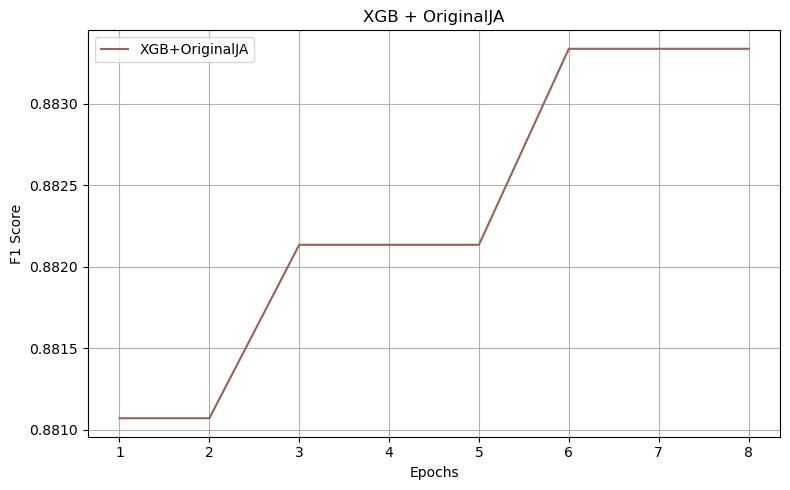

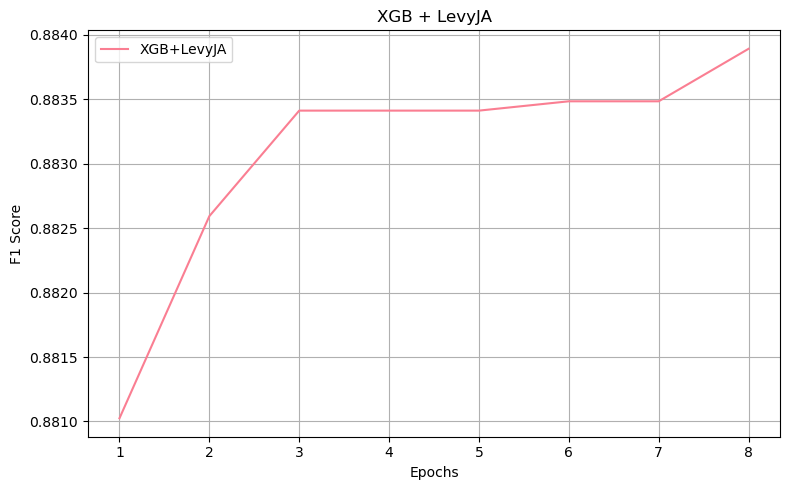

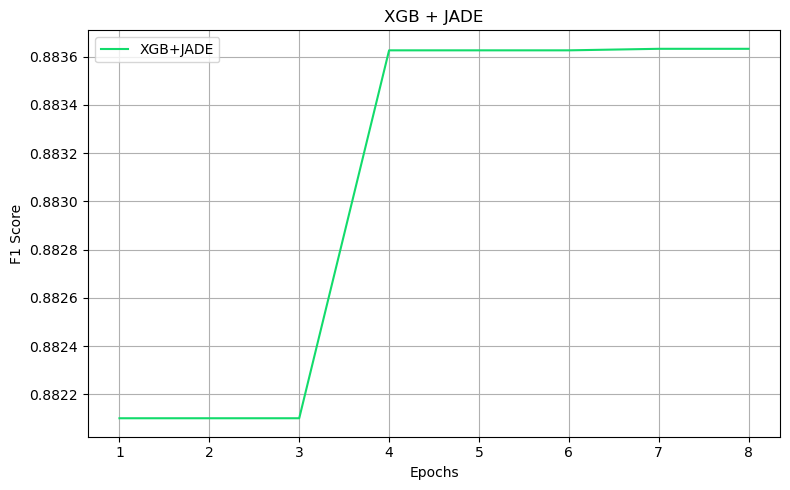

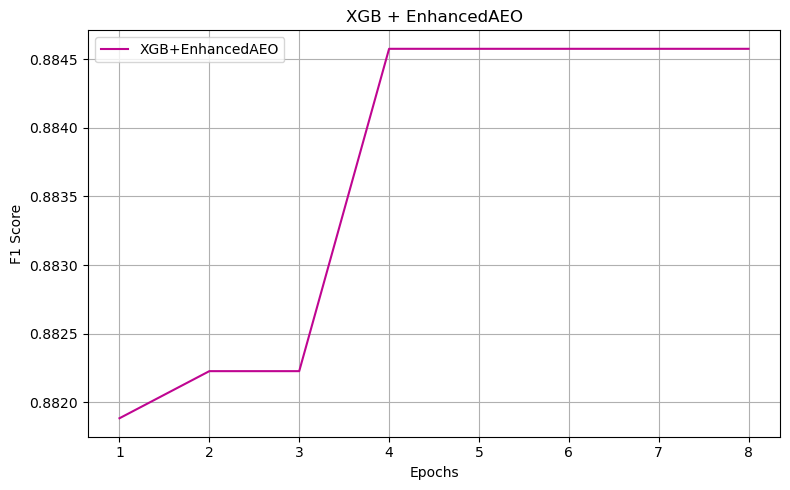


Execution time: 1257.068716287613 seconds


In [42]:
# Store epoch-wise performance for each optimizer
import time
start_time = time.time()
epoch_results = {}

for name, optimizer in optimizers.items():
    if name == "XGB":  # Baseline XGBoost doesn't optimize over epochs
        continue  # Skip baseline for epoch tracking

    print(f"Running optimization for {name}...")
    dim = len(bounds)
    population = np.random.rand(optimizer.pop_size, dim)
    population = optimizer.bounds[:, 0] + population * (optimizer.bounds[:, 1] - optimizer.bounds[:, 0])
    fitness = np.apply_along_axis(optimizer.func, 1, population)

    epoch_scores = []

    for gen in range(optimizer.generations):
        for i in range(optimizer.pop_size):
            idxs = [idx for idx in range(optimizer.pop_size) if idx != i]
            x1, x2, x3 = population[np.random.choice(idxs, 3, replace=False)]
            mutant = x1 + 0.5 * (x2 - x3)
            mutant = np.clip(mutant, optimizer.bounds[:, 0], optimizer.bounds[:, 1])
            crossover = np.random.rand(dim) < 0.9
            trial = np.where(crossover, mutant, population[i])
            trial_fitness = optimizer.func(trial)
            if trial_fitness < fitness[i]:
                population[i] = trial
                fitness[i] = trial_fitness

        # Track the best F1 score in the current epoch
        best_f1 = -np.min(fitness)  # Convert back to positive F1 score
        epoch_scores.append(best_f1)

    epoch_results[name] = epoch_scores

# Plot epoch results for each optimizer
for name, scores in epoch_results.items():
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(scores) + 1), scores, color=np.random.rand(3,), label=f"{name}")
    plt.xlabel("Epochs")
    plt.ylabel("F1 Score")
    print('')
    plt.title(f"XGB + {name.split('+')[1]}")  # Extract optimizer name for title
    plt.grid()
    plt.legend()
    max_epochs = len(scores)
    if max_epochs <= 10:
        xticks = list(range(1, max_epochs + 1))  # Show all ticks for small epoch count
    else:
        xticks = list(range(0, max_epochs + 1, max(1, max_epochs // 10)))  # 10 ticks max
    plt.xticks(xticks)
    plt.tick_params(axis='x', labelsize=10)  # Increase x-axis tick font size
    plt.tick_params(axis='y', labelsize=10)  # Optional: y-axis tick font size
    plt.tight_layout()
    plt.show()
    plt.close()

print('')
print(f"Execution time: {time.time() - start_time} seconds")

In [40]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
param = [0.3509719 ,   9.5616528 , 196.85723416]
learning_rate, max_depth, n_estimators = param
max_depth = int(max_depth)
n_estimators = int(n_estimators)

# Train the model with best parameters
model = xgb.XGBClassifier(
    learning_rate=learning_rate,
    max_depth=max_depth,
    n_estimators=n_estimators,
    random_state=42,
    eval_metric="mlogloss"
)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Get per-class precision, recall, f1, support
prec, rec, f1, support = precision_recall_fscore_support(y_test, y_pred, zero_division=0)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate macro and weighted averages
macro_avg = [prec.mean(), rec.mean(), f1.mean(), accuracy, sum(support)]
weighted_avg = [
    (prec * support).sum() / sum(support),
    (rec * support).sum() / sum(support),
    (f1 * support).sum() / sum(support),
    accuracy,
    sum(support)
]

# Prepare DataFrame
rows = []
for i in range(len(prec)):
    rows.append({
        "Approach": f"Class {i}.0",
        "Precision": round(prec[i], 2),
        "Recall": round(rec[i], 2),
        "F1-Score": round(f1[i], 2),
        "Accuracy": round(accuracy, 2),
        "Support": support[i]
    })

# Add macro and weighted averages
rows.append({
    "Approach": "Macro Avg.",
    "Precision": round(macro_avg[0], 2),
    "Recall": round(macro_avg[1], 2),
    "F1-Score": round(macro_avg[2], 2),
    "Accuracy": round(macro_avg[3], 2),
    "Support": macro_avg[4]
})
rows.append({
    "Approach": "Weighted Avg.",
    "Precision": round(weighted_avg[0], 2),
    "Recall": round(weighted_avg[1], 2),
    "F1-Score": round(weighted_avg[2], 2),
    "Accuracy": round(weighted_avg[3], 2),
    "Support": weighted_avg[4]
})

# Create and display the final table
final_df = pd.DataFrame(rows)
print(final_df)

        Approach  Precision  Recall  F1-Score  Accuracy  Support
0      Class 0.0       0.96    0.90      0.93      0.98     2130
1      Class 1.0       0.98    1.00      0.99      0.98    27203
2      Class 2.0       0.99    0.96      0.97      0.98     2395
3      Class 3.0       0.94    0.66      0.78      0.98      874
4      Class 4.0       0.85    0.68      0.76      0.98      232
5     Macro Avg.       0.94    0.84      0.89      0.98    32834
6  Weighted Avg.       0.98    0.98      0.98      0.98    32834
